In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
import scipy.stats as st

In [4]:
dict={"Roll Number":[1,2,3,4,5],"Names": ["A","B","C","D","E"],"Marks": [88,99,77,54,96]}
df=pd.DataFrame(dict)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Roll Number  5 non-null      int64 
 1   Names        5 non-null      object
 2   Marks        5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [20]:
df.describe([.90,.99,.80])

,Roll Number,Marks
count,5.000000,5.000000
mean,3.000000,82.800000
std,1.581139,18.212633
min,1.000000,54.000000
50%,3.000000,88.000000
80%,4.200000,96.600000
90%,4.600000,97.800000
99%,4.960000,98.880000
max,5.000000,99.000000


In [21]:
df=pd.read_csv('KnowYourCohort.csv')

In [38]:
round(df["Years Of Exp"].mean(),2)

7.37

In [40]:
df[df["Years Of Exp"]>9]

,Years Of Exp,Company Name,Job Title,Field of Study,Major,School Name,Gender,City,State
1,10.0,Accenture,Machine Learning Engineer,Accounting & Auditing,B.Com,Sri Venkateswara University,male,"Bengaluru, Karnataka, India",Karnataka
3,10.0,APIIC,Project Manager,Civil Engineering,B.Tech,Acharya Nagarjuna University,male,vijayawada,Andhra Pradesh
4,10.0,Informatica,QA Engineer,Computer Science / Engineering,B.E,"College of Engineering - Guindy, Anna University",male,Bengaluru,Karnataka
5,10.0,CA Technologies,Technical Architect,Textile,B.Tech,Indian Institute of Technology Delhi,male,Bangalore,Karnataka
7,10.0,Target Corporation,Director Technology - Corporate Systems,Electrical Engineering,B.E,Guru Jambheshwar University of Science and Tec...,male,Bengaluru,Karnataka
...,...,...,...,...,...,...,...,...,...
160,10.0,Fiserv India Pvt. Ltd,Tech Lead,Information & Technology,B.Tech,University of Madras,male,"Pune, Maharashtra, India",Maharashtra
161,18.0,Virtusa,Associate Manager,Production Engineering,B.E.,NIT Surat,Male,Chennai,Tamil Nadu
166,10.0,diya systems Mangalore,Consultant,Computer Science / Engineering,B.E,"Sri JayaChamarajendra college of Engineering, ...",male,Mangalore,Karnataka
167,10.0,Boeing,Tech Lead,Electronics & Electrical Engineering,B.Tech,Jawaharlal Nehru University,male,Bengaluru,Karnataka


In [46]:
df['Gender']=df['Gender'].apply(lambda x:x.lower())
#df[df['Gender'].unique()=='female']

In [56]:
round(100*(df['Gender'].value_counts()[1])/len(df['Gender']),2)

9.94

In [58]:
df['City'].nunique()

42

In [65]:
df['City']=df['City'].apply(lambda x:x.split(',')[0])

In [74]:
df.City.unique()

array(['bengaluru', 'chennai', 'vijayawada', 'pune', 'delhi', 'mumbai',
       'ludhiana', 'noida', 'hyderabad', 'jamshedpur', 'charlotte',
       'ahmedabad', 'ghaziabad', 'kolkata', 'jaipur', 'faridabad',
       'gurgaon', 'pittsburgh', 'houston', 'new delhi', 'nantong',
       'melbourne', 'mysuru', 'durban', 'dubai', 'cary', 'gurugram',
       'chandigarh', 'mangalore'], dtype=object)

In [71]:
wrong_name_lst=['bangalore','bengaluru area','banglore']
right_name='bengaluru'

df['City']=df["City"].replace(wrong_name_lst,right_name)

In [75]:
df['City']=df["City"].replace('gurugram','gurgaon')

In [76]:
df.City.value_counts(normalize=True)

bengaluru     0.561404
pune          0.087719
hyderabad     0.058480
kolkata       0.040936
mumbai        0.029240
chennai       0.029240
delhi         0.023392
gurgaon       0.023392
new delhi     0.017544
noida         0.011696
faridabad     0.011696
ghaziabad     0.011696
melbourne     0.005848
dubai         0.005848
mysuru        0.005848
durban        0.005848
cary          0.005848
chandigarh    0.005848
nantong       0.005848
jaipur        0.005848
houston       0.005848
pittsburgh    0.005848
ahmedabad     0.005848
charlotte     0.005848
jamshedpur    0.005848
ludhiana      0.005848
vijayawada    0.005848
mangalore     0.005848
Name: City, dtype: float64

In [78]:
df.City.value_counts().index[1]

'pune'

In [31]:
market_df=pd.read_csv('market_fact.csv')

In [4]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ord_id               8399 non-null   object 
 1   Prod_id              8399 non-null   object 
 2   Ship_id              8399 non-null   object 
 3   Cust_id              8399 non-null   object 
 4   Sales                8399 non-null   float64
 5   Discount             8399 non-null   float64
 6   Order_Quantity       8399 non-null   int64  
 7   Profit               8399 non-null   float64
 8   Shipping_Cost        8399 non-null   float64
 9   Product_Base_Margin  8336 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 656.3+ KB


In [5]:
market_df.describe()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513
std,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135589
min,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000
25%,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000
50%,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000
75%,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000
max,89061.050000,0.250000,50.000000,27220.690000,164.730000,0.850000


<AxesSubplot:xlabel='Sales', ylabel='Count'>

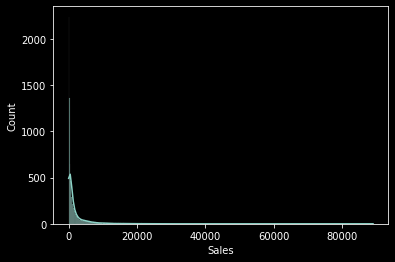

In [15]:
sb.histplot(data=market_df,x='Sales',kde=True)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

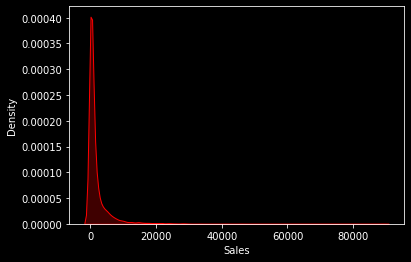

In [18]:
sb.kdeplot(x=market_df['Sales'],shade=True,color='red')

In [22]:
market_df["is_Profit"]=market_df.Profit.apply(lambda x:'Profit' if x>=0 else 'Loss')

In [25]:
100*market_df.is_Profit.value_counts(normalize=True)

Loss      50.767949
Profit    49.232051
Name: is_Profit, dtype: float64

In [26]:
market_df[::2]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,is_Profit
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56,Loss
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59,Profit
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38,Profit
6,Ord_31,Prod_12,SHP_41,Cust_26,14.7600,0.01,5,1.32,0.50,0.36,Profit
8,Ord_4725,Prod_13,SHP_6593,Cust_1641,162.0000,0.01,33,45.84,0.71,0.52,Profit
...,...,...,...,...,...,...,...,...,...,...,...
8390,Ord_5435,Prod_16,SHP_7594,Cust_1798,316.9900,0.04,47,-276.54,8.37,0.58,Loss
8392,Ord_5384,Prod_9,SHP_7519,Cust_1798,181.5000,0.08,43,-6.24,2.50,0.37,Loss
8394,Ord_5353,Prod_4,SHP_7479,Cust_1798,2841.4395,0.08,28,374.63,7.69,0.59,Profit
8396,Ord_5388,Prod_6,SHP_7524,Cust_1798,243.0500,0.02,39,-70.85,5.35,0.40,Loss


In [5]:
market_df.sample(5)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
2535,Ord_1158,Prod_15,SHP_1599,Cust_445,473.8800,0.01,4,-183.26,30.00,0.71
3016,Ord_101,Prod_4,SHP_139,Cust_73,1364.8025,0.07,29,-183.68,5.00,0.83
7444,Ord_46,Prod_6,SHP_60,Cust_33,217.0000,0.01,41,-61.21,4.75,0.36
4032,Ord_1170,Prod_5,SHP_1615,Cust_448,231.2700,0.03,11,89.29,6.67,0.49
600,Ord_4841,Prod_6,SHP_6752,Cust_1675,208.4700,0.01,29,-125.60,8.74,0.36


In [6]:
market_df.head(10)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.37
6,Ord_31,Prod_12,SHP_41,Cust_26,14.7600,0.01,5,1.32,0.50,0.36
7,Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55
8,Ord_4725,Prod_13,SHP_6593,Cust_1641,162.0000,0.01,33,45.84,0.71,0.52
9,Ord_4725,Prod_6,SHP_6593,Cust_1641,57.2200,0.07,8,-27.72,6.60,0.37


In [8]:
cust_lst=['Cust_1818','Cust_1641']
market_df[market_df['Cust_id'].isin(cust_lst)]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.37
7,Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55
8,Ord_4725,Prod_13,SHP_6593,Cust_1641,162.0000,0.01,33,45.84,0.71,0.52
9,Ord_4725,Prod_6,SHP_6593,Cust_1641,57.2200,0.07,8,-27.72,6.60,0.37
10,Ord_4743,Prod_2,SHP_6615,Cust_1641,4072.0100,0.01,43,1675.98,0.99,0.56


In [9]:
market_df.select_dtypes(exclude=object)

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,136.8100,0.01,23,-30.51,3.60,0.56
1,42.2700,0.01,13,4.56,0.93,0.54
2,4701.6900,0.00,26,1148.90,2.50,0.59
3,2337.8900,0.09,43,729.34,14.30,0.37
4,4233.1500,0.08,35,1219.87,26.30,0.38
...,...,...,...,...,...,...
8394,2841.4395,0.08,28,374.63,7.69,0.59
8395,127.1600,0.10,20,-74.03,6.92,0.37
8396,243.0500,0.02,39,-70.85,5.35,0.40
8397,3872.8700,0.03,23,565.34,30.00,0.62


In [20]:
market_df[(market_df['Sales']>=10000) | (market_df['Profit']>4000)]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
17,Ord_4471,Prod_15,SHP_6228,Cust_1521,13255.93,0.02,25,4089.27,26.00,0.60
84,Ord_5232,Prod_17,SHP_7306,Cust_1758,21366.51,0.00,3,-11984.40,24.49,0.39
121,Ord_5423,Prod_17,SHP_7577,Cust_1800,13070.20,0.07,4,-6923.60,8.73,0.57
133,Ord_2432,Prod_3,SHP_3338,Cust_933,15337.58,0.10,30,6670.41,19.99,0.37
165,Ord_4702,Prod_3,SHP_6560,Cust_1603,11823.52,0.10,34,4592.74,19.99,0.40
...,...,...,...,...,...,...,...,...,...,...
8217,Ord_3359,Prod_10,SHP_7245,Cust_1762,28389.14,0.07,33,7132.18,44.55,0.62
8283,Ord_1741,Prod_11,SHP_2411,Cust_595,15168.82,0.02,26,-1096.78,147.12,0.80
8292,Ord_1765,Prod_14,SHP_2446,Cust_595,14647.26,0.07,25,5485.15,24.49,0.37
8332,Ord_2101,Prod_11,SHP_2875,Cust_790,10714.78,0.00,41,-627.64,66.67,0.65


In [33]:
100*market_df.isnull().sum()

Ord_id                 0
Prod_id                0
Ship_id                0
Cust_id                0
Sales                  0
Discount               0
Order_Quantity         0
Profit                 0
Shipping_Cost          0
Product_Base_Margin    0
dtype: int64

In [32]:
market_df.Product_Base_Margin=market_df.Product_Base_Margin.fillna(value=(market_df.Product_Base_Margin.mean()))

In [34]:
cust_df=pd.read_csv('cust_dimen.csv')
orders_df=pd.read_csv('orders_dimen.csv')
prod_df=pd.read_csv('prod_dimen.csv')
ship_df=pd.read_csv('shipping_dimen.csv')

In [35]:
print(market_df.columns)
print(cust_df.columns)

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin'],
      dtype='object')
Index(['Customer_Name', 'Province', 'Region', 'Customer_Segment', 'Cust_id'], dtype='object')


In [ ]:
market_df

In [37]:
m1=pd.merge(market_df,cust_df,how='inner',on='Cust_id')
m2=pd.merge(m1,orders_df,how='inner',on='Ord_id')
m3=pd.merge(m2,prod_df,how='inner',on='Prod_id')
master_df=pd.merge(m3,ship_df,how='inner',on='Ship_id')

In [38]:
master_df.head(2)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,...,Region,Customer_Segment,Order_ID_x,Order_Date,Order_Priority,Product_Category,Product_Sub_Category,Order_ID_y,Ship_Mode,Ship_Date
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,...,WEST,CORPORATE,36262,27-07-2010,NOT SPECIFIED,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",36262,REGULAR AIR,28-07-2010
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,...,ONTARIO,HOME OFFICE,37863,24-02-2011,HIGH,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",37863,REGULAR AIR,26-02-2011


In [ ]:
master_df[['Order_ID_x','Order_ID_y']].corr()

In [45]:
master_df=master_df.drop('Order_ID_x',axis=1)

In [48]:
IPL_2018 = pd.DataFrame({'IPL Team': ['CSK', 'SRH', 'KKR', 'RR', 'MI', 'RCB', 'KXIP', 'DD'],'Matches Played': [16, 17, 16, 15, 14, 14, 14, 14],'Matches Won': [11, 10, 9, 7, 6, 6, 6, 5]})

IPL_2017 = pd.DataFrame({'IPL Team': ['MI', 'RPS', 'KKR', 'SRH', 'KXIP', 'DD', 'GL', 'RCB'],'Matches Played': [17, 16, 16, 15, 14, 14, 14, 14],'Matches Won': [12, 10, 9, 8, 7, 6, 4, 3]})


In [50]:
IPL_2018

,IPL Team,Matches Played,Matches Won
0,CSK,16,11
1,SRH,17,10
2,KKR,16,9
3,RR,15,7
4,MI,14,6
5,RCB,14,6
6,KXIP,14,6
7,DD,14,5


In [49]:
IPL_2017

,IPL Team,Matches Played,Matches Won
0,MI,17,12
1,RPS,16,10
2,KKR,16,9
3,SRH,15,8
4,KXIP,14,7
5,DD,14,6
6,GL,14,4
7,RCB,14,3


In [52]:
IPL_FINAL=pd.merge(IPL_2018,IPL_2017,how='outer',on='IPL Team')

In [74]:
IPL_FINAL

,IPL Team,Total_Matches,Total_Won,Win_Perc
0,MI,31,18,0.58
1,SRH,32,18,0.56
2,KKR,32,18,0.56
3,KXIP,28,13,0.46
4,CSK,16,11,0.69
5,DD,28,11,0.39
6,RPS,16,10,0.62
7,RCB,28,9,0.32
8,RR,15,7,0.47
9,GL,14,4,0.29


In [54]:
IPL_FINAL=IPL_FINAL.fillna(value=0.0)

In [56]:
IPL_FINAL['Total_Matches']=IPL_FINAL['Matches Played_x']+IPL_FINAL['Matches Played_y']
IPL_FINAL['Total_Won']=IPL_FINAL['Matches Won_x']+IPL_FINAL['Matches Won_y']

In [60]:
IPL_FINAL=IPL_FINAL.drop(['Matches Played_x','Matches Played_y','Matches Won_x','Matches Won_y'],axis=1)

In [64]:
IPL_FINAL['Win_Perc']=round(IPL_FINAL['Total_Won']/IPL_FINAL['Total_Matches'],2)

In [68]:
IPL_FINAL=IPL_FINAL.sort_values(by=['Total_Won','Win_Perc'],ascending=False)

In [71]:
IPL_FINAL=IPL_FINAL.reset_index(drop=True)

In [73]:
IPL_FINAL[['Total_Matches','Total_Won']]=IPL_FINAL[['Total_Matches','Total_Won']].astype(int)

In [75]:
IPL_FINAL.to_csv('IPL_FINAL_FINAL.csv',index=False)

In [77]:
cust_grp=master_df.groupby(by='Customer_Segment')

In [79]:
cust_grp.Sales.mean().sort_values(ascending=False)

Customer_Segment
CONSUMER          1857.859965
CORPORATE         1787.680389
HOME OFFICE       1754.312931
SMALL BUSINESS    1698.124841
Name: Sales, dtype: float64

In [82]:
master_df.groupby(by='Customer_Segment')['Profit'].max().sort_values(ascending=True)

Customer_Segment
HOME OFFICE       10521.33
SMALL BUSINESS    13340.26
CORPORATE         14440.39
CONSUMER          27220.69
Name: Profit, dtype: float64

In [85]:
master_df.groupby(by=['Product_Category','Product_Sub_Category'])['Profit'].mean()

Product_Category  Product_Sub_Category          
FURNITURE         BOOKCASES                         -177.683228
                  CHAIRS & CHAIRMATS                 387.693601
                  OFFICE FURNISHINGS                 127.446612
                  TABLES                            -274.411357
OFFICE SUPPLIES   APPLIANCES                         223.866498
                  BINDERS AND BINDER ACCESSORIES     335.970918
                  ENVELOPES                          195.864228
                  LABELS                              47.490174
                  PAPER                               36.949551
                  PENS & ART SUPPLIES                 11.950679
                  RUBBER BANDS                        -0.573575
                  SCISSORS, RULERS AND TRIMMERS      -54.161458
                  STORAGE & ORGANIZATION              12.205403
TECHNOLOGY        COMPUTER PERIPHERALS               124.389815
                  COPIERS AND FAX                   192

In [90]:
pt_df=pd.pivot_table(master_df,index='Product_Sub_Category',columns='Product_Category',values='Sales',aggfunc=np.mean,fill_value=0.0,margins=True,margins_name='Total')

<AxesSubplot:xlabel='Product_Category', ylabel='Product_Sub_Category'>

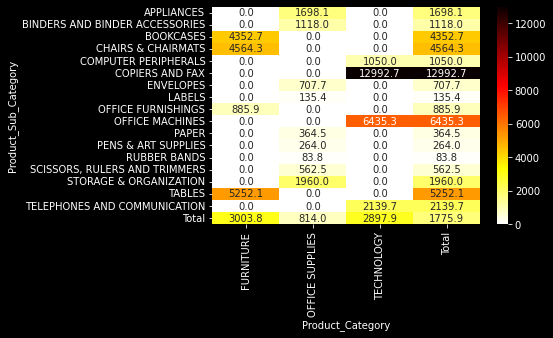

In [95]:
sb.heatmap(data=pt_df,annot=True,fmt='.1f',cmap='hot_r')

In [4]:
x=np.array([1,2,3,4,5])
y=np.array([10,20,30,40,50])

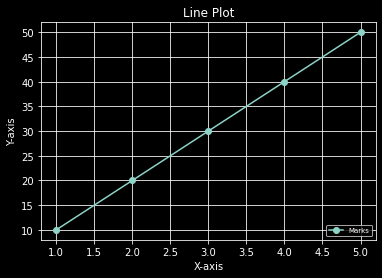

In [12]:
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot')
plt.plot(x,y,marker='o',label='Marks')
plt.legend(loc='lower right',fontsize='x-small')
plt.grid()

In [13]:
market_df=pd.read_csv('market_fact.csv')

In [20]:
corr,pvalues=st.pearsonr(market_df.Sales,market_df.Profit)

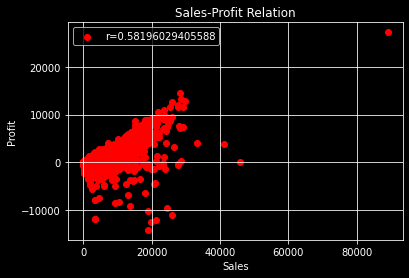

In [21]:
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales-Profit Relation')
plt.scatter(market_df.Sales,market_df.Profit,label='r={}'.format(corr),c='r')
plt.grid()
plt.legend()

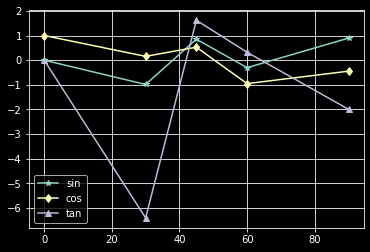

In [9]:
angles=np.array([0,30,45,60,90])
s=np.sin(angles)
c=np.cos(angles)
t=np.tan(angles)

plt.plot(angles,s,label='sin',marker='*')
plt.plot(angles,c,label='cos',marker='d')
plt.plot(angles,t,label='tan',marker='^')
plt.legend()
plt.grid()

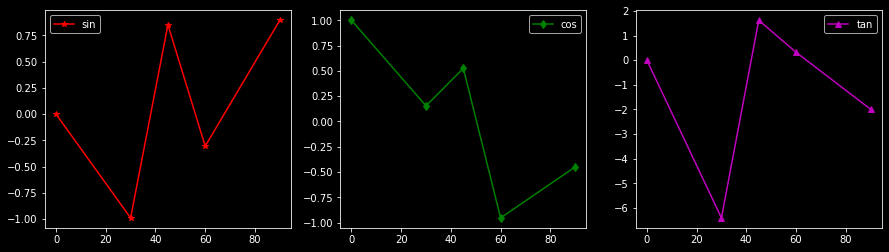

In [15]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.plot(angles,s,label='sin',marker='*',c='r')
plt.legend()
plt.subplot(132)
plt.plot(angles,c,label='cos',marker='d',c='g')
plt.legend()
plt.subplot(133)
plt.plot(angles,t,label='tan',marker='^',c='m')
plt.legend()

In [17]:
odi_df=pd.read_csv('tendulkar_ODI.csv')

In [18]:
odi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  295 non-null    int64 
 1   Runs        295 non-null    object
 2   Mins        295 non-null    object
 3   BF          295 non-null    object
 4   4s          295 non-null    object
 5   6s          295 non-null    object
 6   SR          295 non-null    object
 7   Pos         295 non-null    object
 8   Dismissal   295 non-null    object
 9   Inns        295 non-null    object
 10  Opposition  295 non-null    object
 11  Ground      295 non-null    object
 12  Start Date  295 non-null    object
dtypes: int64(1), object(12)
memory usage: 30.1+ KB


In [20]:
odi_df.Runs=odi_df.Runs.apply(lambda x:x.split('*')[0])

In [25]:
list=['DNB','TDNB']
odi_df2=odi_df[~odi_df.Runs.isin(list)]

In [27]:
odi_df2.Runs=odi_df2.Runs.astype(int)

/home/sameer/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [30]:
odi_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 294
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  292 non-null    int64 
 1   Runs        292 non-null    int64 
 2   Mins        292 non-null    object
 3   BF          292 non-null    object
 4   4s          292 non-null    object
 5   6s          292 non-null    object
 6   SR          292 non-null    object
 7   Pos         292 non-null    object
 8   Dismissal   292 non-null    object
 9   Inns        292 non-null    object
 10  Opposition  292 non-null    object
 11  Ground      292 non-null    object
 12  Start Date  292 non-null    object
dtypes: int64(2), object(11)
memory usage: 31.9+ KB


In [33]:
odi_df2['Run_Bucket']=pd.cut(odi_df2['Runs'],bins=20,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110','110-120','120-130','130-140','140-150','150-160','160-170','170-180','180-190','190-200'])

/tmp/ipykernel_3987/3420543180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_df2['Run_Bucket']=pd.cut(odi_df2['Runs'],bins=20,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110','110-120','120-130','130-140','140-150','150-160','160-170','170-180','180-190','190-200'])


<AxesSubplot:xlabel='Run_Bucket', ylabel='count'>

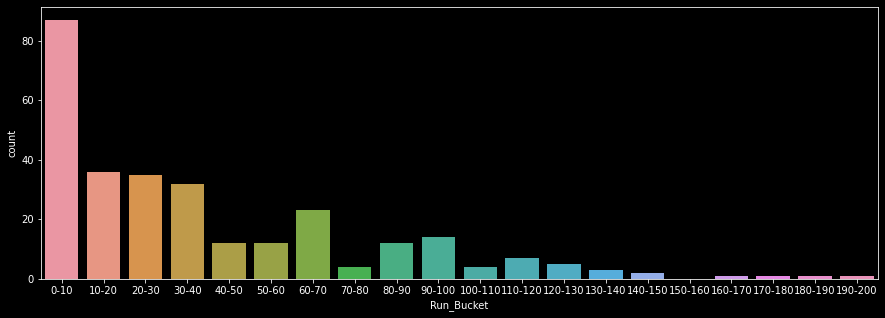

In [38]:
plt.figure(figsize=(15,5))
sb.countplot(data=odi_df2,x='Run_Bucket')

<AxesSubplot:xlabel='Run_Bucket', ylabel='Count'>

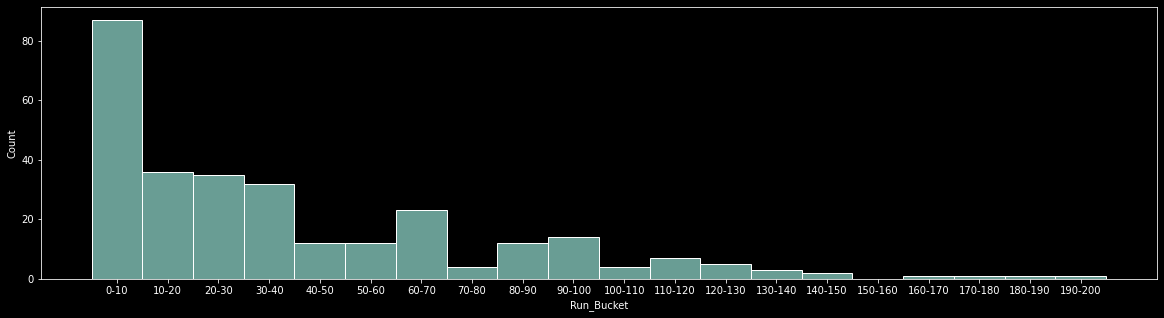

In [41]:
plt.figure(figsize=(20,5))
sb.histplot(data=odi_df2,x='Run_Bucket')

In [45]:
odi_df2['4s']=odi_df2['4s'].astype(np.int8)

/tmp/ipykernel_3987/1412490946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_df2['4s']=odi_df2['4s'].astype(np.int8)


<AxesSubplot:xlabel='count', ylabel='4s'>

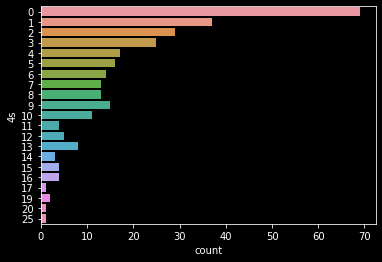

In [50]:
sb.countplot(data=odi_df2,y='4s')